In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

In [2]:
PATH = "../Dados/Armarios/"

In [3]:
consumo_macroregioes = pd.read_csv(PATH + 'consumo_macroregioes.txt', sep = '\t')
consumo_macroregioes['mes'] = consumo_macroregioes['mes'].astype('string')
consumo_macroregioes.dtypes

contagem         int64
custo          float64
consumo        float64
mes             string
macroregiao     object
dtype: object

In [ ]:
estados_armarios['consumo'].loc[estados_armarios['macroregiao'] == 'NE'].sum()

In [4]:
consumo_macroregioes['mes'] = consumo_macroregioes['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
consumo_macroregioes

,contagem,custo,consumo,mes,macroregiao
0,442,480234.46,651819.30,2017-01-01,NE
1,1621,1736961.80,2578865.00,2017-01-01,S
2,717,679924.46,979926.39,2017-01-01,CO
3,1534,1370699.86,1975685.45,2017-01-01,SE
4,726,652974.70,933461.28,2017-02-01,CO
...,...,...,...,...,...
318,375,204373.67,241066.03,2022-05-01,CO
319,1,2063.19,1776.00,2022-05-01,N
320,497,656417.78,571878.00,2022-05-01,NE
321,1563,1322533.63,1542652.84,2022-05-01,S


In [ ]:
optimal_n = None

best_mse = None

db = consumo_macroregioes[['consumo']].loc[consumo_macroregioes['macroregiao']=='SE'].values.astype('float32')

mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))


for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i + n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)


print("MSE = %s" % mean_results_for_all_possible_n_values)
print("Melhor MSE = %s" % best_mse)
print("Otimo n = %s" % optimal_n)

In [ ]:
print('MA = %s' % np.mean(db[:, 0][len(db) - optimal_n:len(db)]))

In [ ]:
fig = plt.figure(figsize=(10,5))
forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
        forecast[i+optimal_n] = np.mean(db[:, 0][i:i+optimal_n])
plt.plot(db[:, 0],label = 'Dados Originais')
plt.plot(forecast, label = 'Previsão')
plt.legend()
plt.show()

In [4]:
data = consumo_macroregioes[['consumo', 'mes']].loc[consumo_macroregioes['macroregiao']=='SE']
#data = pd.DataFrame(consumo_macroregioes.groupby('mes')['consumo'].sum())
#data.reset_index(inplace=True)
data

,consumo,mes
3,1975685.45,201701
8,1918435.64,201702
13,2095963.00,201703
18,1793219.74,201704
23,2133632.30,201705
...,...,...
302,1445668.92,202201
307,1389495.49,202202
312,1464993.20,202203
317,1371781.80,202204


In [ ]:
dados_2017['mes'].dt.strftime('%m')

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(dados_2017['mes'], dados_2017['consumo'], color = 'blue')
plt.plot(dados_2018['mes'], dados_2018['consumo'], color = 'green')
plt.plot(dados_2019['mes'], dados_2019['consumo'], color = 'orange')
plt.plot(dados_2020['mes'], dados_2020['consumo'], color = 'black')
plt.plot(dados_2021['mes'], dados_2021['consumo'], color = 'pink')
plt.title("consumo", fontsize = 24)
plt.ylabel("Consumo")
plt.xlabel("Data")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
X = data['consumo']
result = adfuller(X)
result
print('ADF Estatíticas: %f' % result[0])
print('Valor de P: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
data.set_index('mes', inplace=True)
d_log=np.log(data)

In [ ]:
plt.plot(d_log)

In [ ]:
plt.plot(data)

In [ ]:
y = data['consumo']

def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Resutaldo do Teste Dickey-Fuller:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor p', '# de lags', '# de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valores Críticos ({})'.format(key)] = value
    print(dfoutput)

In [ ]:
def kpss_test(y):
    print("Results of KPSS Test:")
    kpsstest = kpss(y, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [ ]:
adf_test(y)

In [ ]:
y_diff = np.diff(y)

In [ ]:
y_diff

In [ ]:
fig = plt.figure(figsize=(15,8))
plt.plot(y_diff)

In [ ]:
adf_test(y_diff)

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test(y)

In [ ]:
rolmean  = data.rolling(window=12).mean() #12 meses
rolstd = data.rolling(window=12).std()
print(rolmean)

In [ ]:
rolstd

In [ ]:
data = data[['consumo', 'mes']]
data.set_index('mes', inplace=True)

In [ ]:
indexedDataset_logScale = np.log(data)
plt.plot(indexedDataset_logScale)

In [ ]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [ ]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

In [ ]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

In [ ]:
#teste de estacionariedade, este é diferente porque vai plotar os resultados
def test_stationarity(timeseries):
    #estatisticas moveis
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #imprime estatisticas moveis
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Média Móvel')
    std = plt.plot(movingSTD, color='black', label = 'Desvio Padrão ')
    plt.legend(loc='best')
    plt.title('Média Movei e Desvio Padrão')
    plt.show(block=False)
    
    #teste de Dickey-Fuller
    print('Resultados do Teste de Dickey-Fuller:')
    dftest = adfuller(timeseries['consumo'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística de Teste', 'valor de p', '# de intervalos', '# de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valor crítico ({})'.format(key)] = value
    print(dfoutput)     

In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [ ]:
X = [i for i in range(0,len(data))]
X = np.reshape( X, (len(X),1))
y = data.values

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X, y)

In [ ]:
trend = model.predict(X)

In [ ]:
plt.plot(y)
plt.plot(trend)
plt.show()

In [ ]:
detrended = [y[i]-trend[i] for i in range(0, len(data))]

In [ ]:
# plot detrended
plt.plot(detrended)
plt.plot(y)
plt.plot(trend)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(data)
plt.title("consumo", fontsize = 24)
plt.ylabel("Consumo")
plt.xlabel("Data")
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(data, model='multiplicative')

In [ ]:
result.plot()
plt.show()

In [ ]:
result2 = seasonal_decompose(data, model='aditive')
result2.plot()
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 6))



x = consumo_macroregioes['mes'].loc[consumo_macroregioes['macroregiao']=='NE']
y = consumo_macroregioes['consumo'].loc[consumo_macroregioes['macroregiao']=='NE']
mm3 = consumo_macroregioes['consumo'].loc[consumo_macroregioes['macroregiao']=='NE'].rolling(12).mean()
plt.plot(x, y, label='Real', color='#3CADF2')
plt.plot(x, mm3, label='Média Móvel de 3', color='red')



plt.legend()
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#plt.gcf().autofmt_xdate()

In [ ]:
fig = plt.figure(figsize=(20, 6))



x = consumo_macroregioes['mes'].loc[consumo_macroregioes['macroregiao']=='SE']
y = consumo_macroregioes['consumo'].loc[consumo_macroregioes['macroregiao']=='SE']
mm3 = consumo_macroregioes['consumo'].loc[consumo_macroregioes['macroregiao']=='SE'].rolling(12).mean()
plt.plot(x, y, label='Real', color='#3CADF2')
plt.plot(x, mm3, label='Média Móvel de 3', color='red')



plt.legend()
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#plt.gcf().autofmt_xdate()

In [ ]:
fig = plt.figure(figsize=(20, 6))



x = consumo_macroregioes['mes'].loc[consumo_macroregioes['macroregiao']=='S']
y = consumo_macroregioes['consumo'].loc[consumo_macroregioes['macroregiao']=='S']
mm3 = consumo_macroregioes['consumo'].loc[consumo_macroregioes['macroregiao']=='S'].rolling(12).mean()
plt.plot(x, y, label='Real', color='#3CADF2')
plt.plot(x, mm3, label='Média Móvel de 3', color='red')



plt.legend()
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#plt.gcf().autofmt_xdate()

In [ ]:
fig = plt.figure(figsize=(20, 6))



x = consumo_macroregioes['mes'].loc[consumo_macroregioes['macroregiao']=='CO']
y = consumo_macroregioes['consumo'].loc[consumo_macroregioes['macroregiao']=='CO']
mm3 = consumo_macroregioes['consumo'].loc[consumo_macroregioes['macroregiao']=='CO'].rolling(5).median()
plt.plot(x, y, label='Real', color='#3CADF2')
plt.plot(x, mm3, label='Média Móvel de 3', color='red')



plt.legend()
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#plt.gcf().autofmt_xdate()

In [ ]:
fig = plt.figure(figsize=(20, 6))



x = consumo_macroregioes['mes'].loc[consumo_macroregioes['macroregiao']=='CO']
y = consumo_macroregioes['consumo'].loc[consumo_macroregioes['macroregiao']=='CO']
mm3 = consumo_macroregioes['consumo'].loc[consumo_macroregioes['macroregiao']=='CO'].rolling(5).mean()
plt.plot(x, y, label='Real', color='#3CADF2')
plt.plot(x, mm3, label='Média Móvel de 3', color='red')



plt.legend()
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#plt.gcf().autofmt_xdate()

In [6]:
consumo_macroregioes

,contagem,custo,consumo,mes,macroregiao
0,442,480234.46,651819.30,201701,NE
1,1621,1736961.80,2578865.00,201701,S
2,717,679924.46,979926.39,201701,CO
3,1534,1370699.86,1975685.45,201701,SE
4,726,652974.70,933461.28,201702,CO
...,...,...,...,...,...
318,375,204373.67,241066.03,202205,CO
319,1,2063.19,1776.00,202205,N
320,497,656417.78,571878.00,202205,NE
321,1563,1322533.63,1542652.84,202205,S


In [7]:
consumo_macroregioes['Ticks'] = range(0,len(consumo_macroregioes.index.values))
consumo_macroregioes

,contagem,custo,consumo,mes,macroregiao,Ticks
0,442,480234.46,651819.30,201701,NE,0
1,1621,1736961.80,2578865.00,201701,S,1
2,717,679924.46,979926.39,201701,CO,2
3,1534,1370699.86,1975685.45,201701,SE,3
4,726,652974.70,933461.28,201702,CO,4
...,...,...,...,...,...,...
318,375,204373.67,241066.03,202205,CO,318
319,1,2063.19,1776.00,202205,N,319
320,497,656417.78,571878.00,202205,NE,320
321,1563,1322533.63,1542652.84,202205,S,321


In [9]:
consumo_macroregioes.dtypes

contagem         int64
custo          float64
consumo        float64
mes             string
macroregiao     object
Ticks            int64
dtype: object

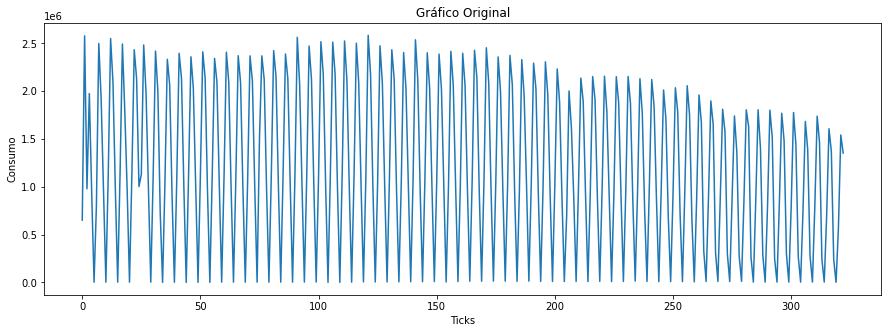

In [12]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Consumo')
ax1.set_title('Gráfico Original')
ax1.plot('Ticks', 'consumo', data = consumo_macroregioes);

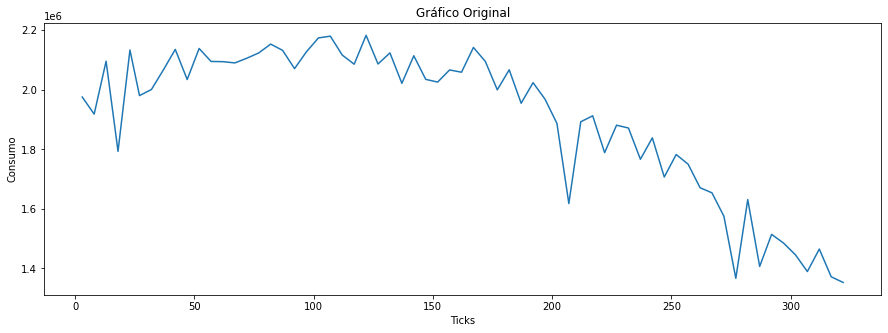

In [13]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Consumo')
ax1.set_title('Gráfico Original')
ax1.plot('Ticks', 'consumo', data = consumo_macroregioes.loc[consumo_macroregioes['macroregiao']=='SE']);

In [18]:
consumo_se = consumo_macroregioes.loc[consumo_macroregioes['macroregiao']=='SE']
consumo_se['Ticks'] = range(0,len(consumo_se.index.values))

consumo_se['Rolling_Mean'] = consumo_se['consumo'].rolling(window = 6).mean()
consumo_se.head(10)

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_11616/3514279077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_se['Ticks'] = range(0,len(consumo_se.index.values))
C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_11616/3514279077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_se['Rolling_Mean'] = consumo_se['consumo'].rolling(window = 6).mean()


,contagem,custo,consumo,mes,macroregiao,Ticks,Rolling_Mean
3,1534,1370699.86,1975685.45,201701,SE,0,NaN
8,1542,1344390.51,1918435.64,201702,SE,1,NaN
13,1576,1489638.15,2095963.00,201703,SE,2,NaN
18,1479,1280237.19,1793219.74,201704,SE,3,NaN
23,1597,1470436.65,2133632.30,201705,SE,4,NaN
27,1550,1393526.94,1980589.30,201706,SE,5,1982920.905
32,1576,1386597.99,2000941.40,201707,SE,6,1987130.230
37,1625,1450305.20,2066683.40,201708,SE,7,2011838.190
42,1620,1526589.93,2135728.90,201709,SE,8,2018465.840
47,1625,1464329.31,2034511.00,201710,SE,9,2058681.050


In [19]:
len(consumo_se)

65

In [20]:
filt_g = consumo_se[(consumo_se['Ticks'] >= 10) & (consumo_se['Ticks'] <= 60)]
filt_g.head()

,contagem,custo,consumo,mes,macroregiao,Ticks,Rolling_Mean
52,1624,1625595.03,2138837.52,201711,SE,10,2.059549e+06
57,1635,1596927.57,2095294.80,201712,SE,11,2.078666e+06
62,1619,1526200.01,2094520.20,201801,SE,12,2.094263e+06
67,1652,1475020.69,2090324.00,201802,SE,13,2.098203e+06
72,1651,1485597.91,2106138.00,201803,SE,14,2.093271e+06


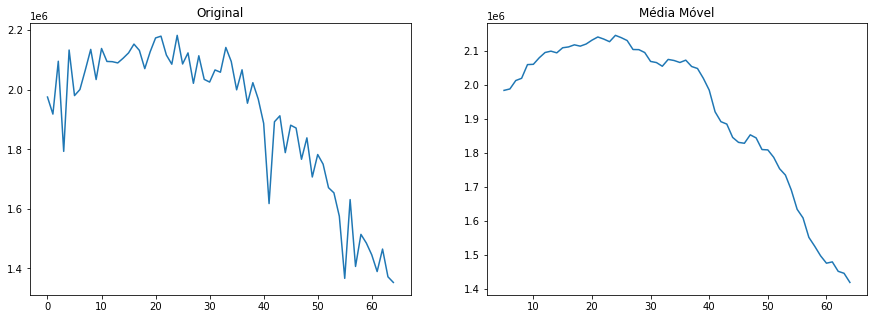

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('Ticks', 'consumo', data = consumo_se);
axes[0].set_title('Original');

axes[1].plot('Ticks', 'Rolling_Mean', data = consumo_se);
axes[1].set_title('Média Móvel');

In [28]:
consumo_se_filtrado = consumo_se.loc[(consumo_se['mes'].str.startswith('2020')) | (consumo_se['mes'].str.startswith('2021')) | (consumo_se['mes'].str.startswith('2022')) ]
consumo_se_filtrado

,contagem,custo,consumo,mes,macroregiao,Ticks,Rolling_Mean
182,1679,1418193.61,2067242.02,202001,SE,36,2.071775e+06
187,1655,1343397.19,1954905.24,202002,SE,37,2.053133e+06
192,1639,1375250.40,2023947.80,202003,SE,38,2.047279e+06
197,1640,1390148.15,1968684.81,202004,SE,39,2.018340e+06
202,1582,1294527.17,1887280.48,202005,SE,40,1.983672e+06
207,1399,1105343.68,1617839.95,202006,SE,41,1.919983e+06
212,1607,1326067.34,1892651.52,202007,SE,42,1.890885e+06
217,1588,1372011.87,1912654.55,202008,SE,43,1.883843e+06
222,1568,1336934.85,1788913.39,202009,SE,44,1.844671e+06
227,1557,1393079.00,1881139.45,202010,SE,45,1.830080e+06


In [31]:
consumo_se_filtrado['Ticks'] = range(0,len(consumo_se_filtrado.index.values))

consumo_se_filtrado['Rolling_Mean'] = consumo_se_filtrado['consumo'].rolling(window = 3).mean()
consumo_se_filtrado

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_11616/3717799595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_se_filtrado['Ticks'] = range(0,len(consumo_se_filtrado.index.values))
C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_11616/3717799595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_se_filtrado['Rolling_Mean'] = consumo_se_filtrado['consumo'].rolling(window = 3).mean()


,contagem,custo,consumo,mes,macroregiao,Ticks,Rolling_Mean
182,1679,1418193.61,2067242.02,202001,SE,0,NaN
187,1655,1343397.19,1954905.24,202002,SE,1,NaN
192,1639,1375250.40,2023947.80,202003,SE,2,2.015365e+06
197,1640,1390148.15,1968684.81,202004,SE,3,1.982513e+06
202,1582,1294527.17,1887280.48,202005,SE,4,1.959971e+06
207,1399,1105343.68,1617839.95,202006,SE,5,1.824602e+06
212,1607,1326067.34,1892651.52,202007,SE,6,1.799257e+06
217,1588,1372011.87,1912654.55,202008,SE,7,1.807715e+06
222,1568,1336934.85,1788913.39,202009,SE,8,1.864740e+06
227,1557,1393079.00,1881139.45,202010,SE,9,1.860902e+06


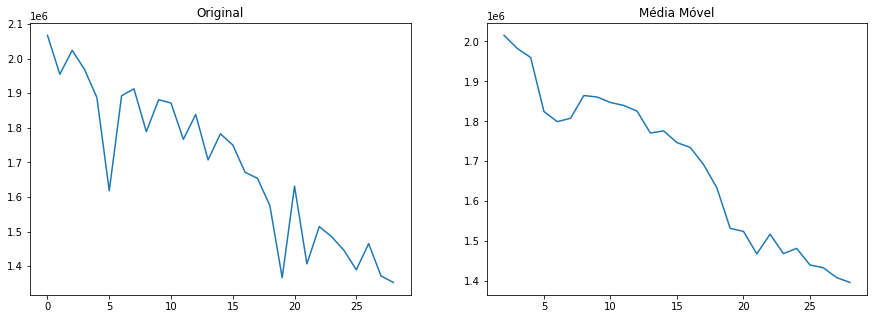

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('Ticks', 'consumo', data = consumo_se_filtrado);
axes[0].set_title('Original');

axes[1].plot('Ticks', 'Rolling_Mean', data = consumo_se_filtrado);
axes[1].set_title('Média Móvel');

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [37]:
data = consumo_se[['mes', 'consumo']]
data['mes'] = data['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
data.set_index('mes', inplace=True)
data

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_11616/1040726899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mes'] = data['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))


,consumo
mes,
2017-01-01,1975685.45
2017-02-01,1918435.64
2017-03-01,2095963.00
2017-04-01,1793219.74
2017-05-01,2133632.30
...,...
2022-01-01,1445668.92
2022-02-01,1389495.49
2022-03-01,1464993.20


In [38]:
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')

C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


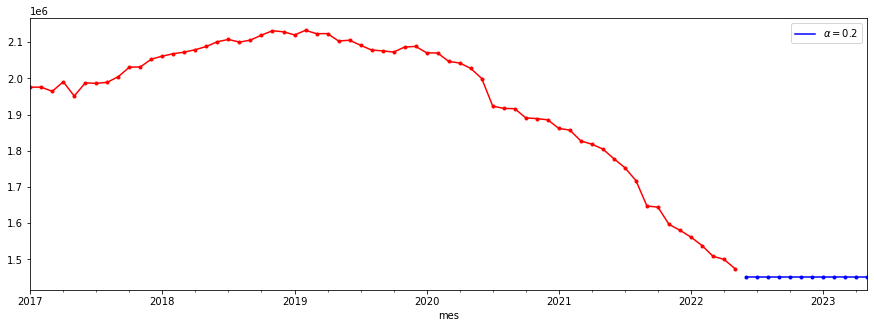

In [41]:
fig = plt.figure(figsize=(15,5))
fcast1.plot(marker='.', color='blue', legend=True)
fit1.fittedvalues.plot(marker='.',  color='red')
plt.show()

C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='mes'>

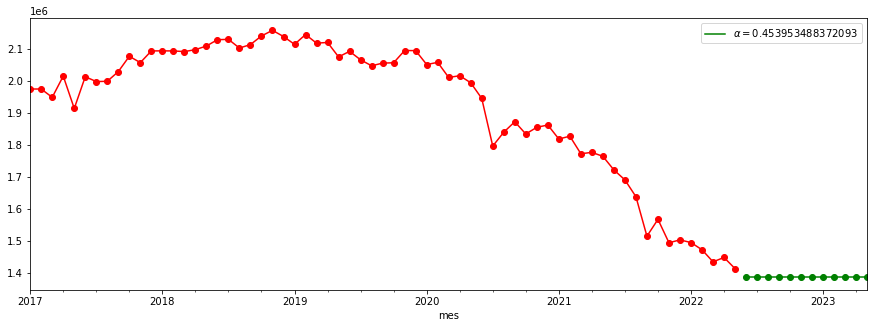

In [42]:
fig = plt.figure(figsize=(15,5))
fit3 = SimpleExpSmoothing(data).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='red')

In [5]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [13]:
data = consumo_macroregioes[['mes', 'consumo']].loc[consumo_macroregioes['macroregiao']=='SE']
data.set_index('mes', inplace=True)
data

,consumo
mes,
2017-01-01,1975685.45
2017-02-01,1918435.64
2017-03-01,2095963.00
2017-04-01,1793219.74
2017-05-01,2133632.30
...,...
2022-01-01,1445668.92
2022-02-01,1389495.49
2022-03-01,1464993.20


In [14]:
fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")#for next 12 months

C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_3456/2797378057.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='mes'>

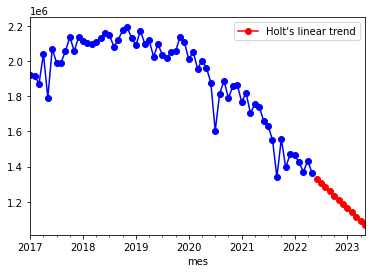

In [15]:
fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='red', marker="o", legend=True)

In [16]:
fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_3456/3004654563.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_3456/3004654563.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed

<AxesSubplot:xlabel='mes'>

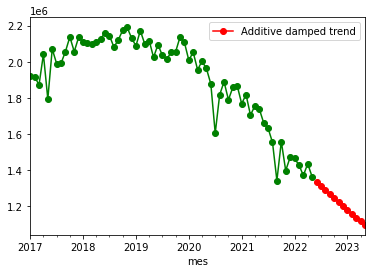

In [17]:
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='red', marker="o", legend=True)

In [35]:
data = consumo_macroregioes[['mes', 'consumo']].loc[consumo_macroregioes['macroregiao']=='S']
data.set_index('mes', inplace=True)
data.iloc[36:,]

,consumo
mes,
2020-01-01,2373871.65
2020-02-01,2330485.21
2020-03-01,2293227.25
2020-04-01,2307155.05
2020-05-01,2232839.16
2020-06-01,2002953.06
2020-07-01,2136532.31
2020-08-01,2153156.95
2020-09-01,2156872.24


In [36]:
fit1 = ExponentialSmoothing(data.iloc[36:,], seasonal_periods=12, trend='additive', seasonal='additive').fit(use_boxcox=True)

C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:xlabel='mes'>

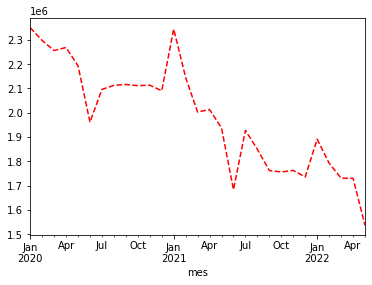

In [37]:
fit1.fittedvalues.plot(style='--', color='red')

C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:>

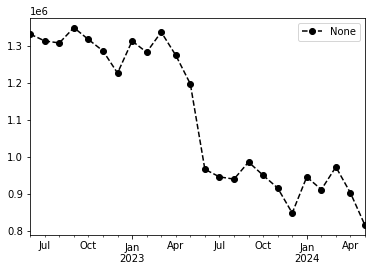

In [38]:
fit1.forecast(24).plot(style='--', marker='o', color='black', legend=True)

C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='mes'>

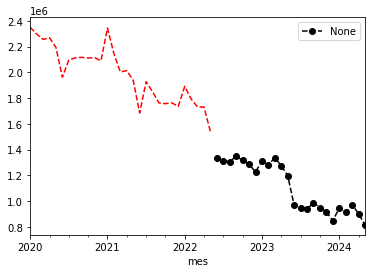

In [39]:
fit1.fittedvalues.plot(style='--', color='red')
fit1.forecast(24).plot(style='--', marker='o', color='black', legend=True)

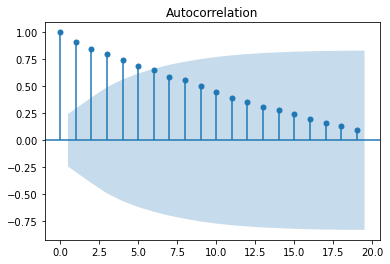

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

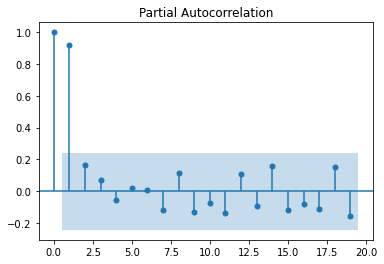

In [41]:
plot_pacf(data)
plt.show()

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.consumo   No. Observations:                   64
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -798.934
Method:                       css-mle   S.D. of innovations          63727.586
Date:                Tue, 16 Aug 2022   AIC                           1611.868
Time:                        15:07:08   BIC                           1626.981
Sample:                    02-01-2017   HQIC                          1617.822
                         - 05-01-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.619e+04   5643.977     -2.869      0.004   -2.73e+04   -5128.824
ar.L1.D.consumo    -0.3585      0.126     -2.854      0.004      -0.605      -0.112
ar.L2.D.consumo    -0.0662      

C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequen

In [45]:
model = ARIMA(data, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.consumo   No. Observations:                   64
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -799.723
Method:                       css-mle   S.D. of innovations          64577.628
Date:                Tue, 16 Aug 2022   AIC                           1609.446
Time:                        15:09:26   BIC                           1620.241
Sample:                    02-01-2017   HQIC                          1613.699
                         - 05-01-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.567e+04   5583.189     -2.807      0.005   -2.66e+04   -4727.542
ar.L1.D.consumo    -0.4156      0.774     -0.537      0.592      -1.934       1.102
ar.L2.D.consumo    -0.0983      

C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequen

In [46]:
from pandas import DataFrame

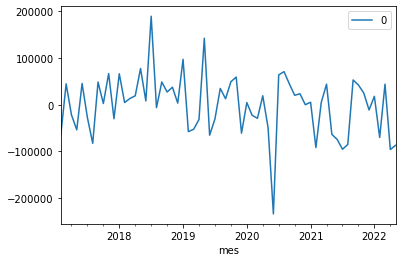

In [47]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

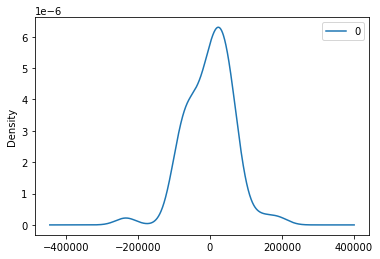

                   0
count      64.000000
mean     -228.618936
std     65152.781647
min   -233718.782422
25%    -50053.815174
50%      4906.541289
75%     44124.023510
max    189279.877168


In [48]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [49]:
X = data.values

C:\Users\talmeidar\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=2124203.423825, expected=2121784.450000
predicted=2113014.351217, expected=2012577.340000
predicted=2046158.603914, expected=2036067.820000
predicted=2019614.863519, expected=2057453.620000
predicted=2029035.708019, expected=1960787.770000
predicted=1977269.610222, expected=1898290.670000
predicted=1937077.160144, expected=1811788.080000
predicted=1827878.070963, expected=1741147.020000
predicted=1729968.540412, expected=1804804.020000
predicted=1765218.820283, expected=1805777.820000
predicted=1778319.551911, expected=1802212.130000
predicted=1791422.927080, expected=1769657.200000
predicted=1773957.333009, expected=1777283.240000
predicted=1750780.458569, expected=1684174.120000
predicted=1695176.384854, expected=1739446.510000
predicted=1705000.752828, expected=1607744.690000
predicted=1636324.353532, expected=1542652.840000


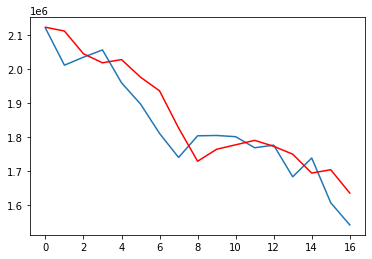

In [50]:
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [53]:
from pmdarima.arima import auto_arima

In [54]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1336.554, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1333.555, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1334.409, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1334.458, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1334.443, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1333.305, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1335.810, Time=0.19 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1335.232, Time=0.09 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1337.178, Time=0.55 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1334.414, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=1334.942, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 1.271 seconds


In [55]:
print(stepwise_model.aic())

1333.3045680505609


In [56]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1333.555, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1333.305, Time=0.04 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1335.232, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1334.443, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1335.810, Time=0.17 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1337.178, Time=0.43 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1337.108, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1333.384, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1334.458, Time=0.05 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1336.450, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1334.452, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1336.406, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1338.398, Time=0.51 sec
 ARIM

In [57]:
print(stepwise_model.aic())

1330.4133839268613


In [66]:
train = data.loc['2017-01-01':'2020-12-01']
test = data.loc['2021-01-01':]

In [67]:
stepwise_model.fit(train)

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [75]:
future_forecast = stepwise_model.predict(n_periods=17)

In [76]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["consumo"])

<AxesSubplot:xlabel='mes'>

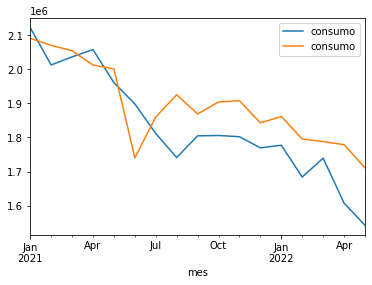

In [77]:
pd.concat([test,future_forecast],axis=1).plot()

<AxesSubplot:xlabel='mes'>

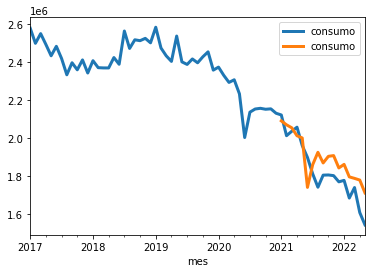

In [78]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)

In [14]:
data = consumo_macroregioes[['mes', 'consumo']].loc[consumo_macroregioes['macroregiao']=='SE']
data['mes'] = data['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
data.set_index('mes', inplace = True)
data

,consumo
mes,
2017-01-01,1975685.45
2017-02-01,1918435.64
2017-03-01,2095963.00
2017-04-01,1793219.74
2017-05-01,2133632.30
...,...
2022-01-01,1445668.92
2022-02-01,1389495.49
2022-03-01,1464993.20


In [15]:
differenced = data.diff(12)
differenced.head(n=13)

,consumo
mes,
2017-01-01,NaN
2017-02-01,NaN
2017-03-01,NaN
2017-04-01,NaN
2017-05-01,NaN
2017-06-01,NaN
2017-07-01,NaN
2017-08-01,NaN
2017-09-01,NaN


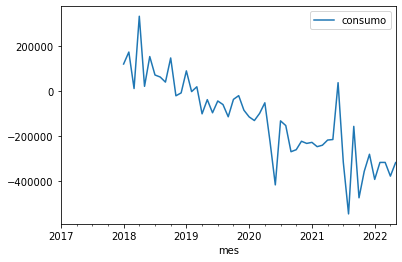

In [16]:
from matplotlib import pyplot
from pandas import Series
differenced.plot()
pyplot.show()

In [17]:
differenced = differenced[12:]

In [18]:
differenced.head(n=13)

,consumo
mes,
2018-01-01,118834.75
2018-02-01,171888.36
2018-03-01,10175.00
2018-04-01,330731.96
2018-05-01,19910.70
2018-06-01,151919.10
2018-07-01,70179.20
2018-08-01,61108.80
2018-09-01,38536.90


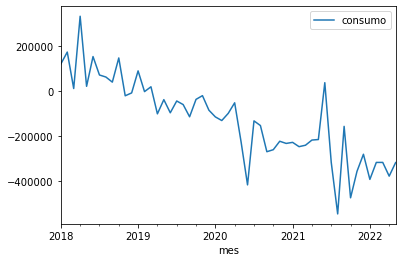

In [19]:
differenced.plot()
pyplot.show()

In [20]:
dataframe = pd.DataFrame()
for i in range(12,0,-1):
    dataframe['t-'+str(i)] = differenced.shift(i)
    dataframe['t'] = differenced.values
print(dataframe.head(13))
dataframe = dataframe[13:]

                 t-12          t       t-11       t-10        t-9        t-8  \
mes                                                                            
2018-01-01        NaN  118834.75        NaN        NaN        NaN        NaN   
2018-02-01        NaN  171888.36        NaN        NaN        NaN        NaN   
2018-03-01        NaN   10175.00        NaN        NaN        NaN        NaN   
2018-04-01        NaN  330731.96        NaN        NaN        NaN        NaN   
2018-05-01        NaN   19910.70        NaN        NaN        NaN        NaN   
2018-06-01        NaN  151919.10        NaN        NaN        NaN        NaN   
2018-07-01        NaN   70179.20        NaN        NaN        NaN        NaN   
2018-08-01        NaN   61108.80        NaN        NaN        NaN        NaN   
2018-09-01        NaN   38536.90        NaN        NaN        NaN  118834.75   
2018-10-01        NaN  145723.40        NaN        NaN  118834.75  171888.36   
2018-11-01        NaN  -22061.42        

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [25]:
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

RandomForestRegressor(n_estimators=500, random_state=1)

In [26]:
print(model.feature_importances_)

[0.10038351 0.06699455 0.06424123 0.08521431 0.02854305 0.03082025
 0.00863032 0.05200365 0.15815606 0.18673052 0.05417785 0.1641047 ]


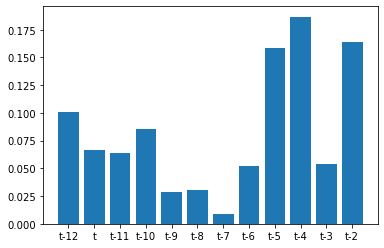

In [27]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

In [28]:
from sklearn.feature_selection import RFE

In [29]:
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)

C:\Users\talmeidar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [30]:
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

t-12
t-5
t-4
t-2
